# Task Description

## Implementation

The task involves implementing and evaluating three classifiers for diagnosing breast cancer using a dataset of patients tested via fine needle aspiration (FNA). The dataset contains statistics of 10 different features of multiple cell samples, along with a diagnosis (malignant or benign).

1. **Rule-based Classifier**: A rule-based classifier where abnormal cell size, shape, texture, or homogeneity indicate malignancy.

2. **Random Forest Classifier**: Applied to the supplied dataset features using the sklearn framework.

3. **Custom Classifier**: Designed to balance interpretability and classification performance.

### Rule-based Classifier
For the rule-based classifier, appropriate variables need to be defined based on medical insights and the available data. The rules are interpreted from the medical insights provided.

### Random Forest Classifier
The sklearn framework is used to implement a random forest classifier on the dataset features.

### Custom Classifier
A custom classifier is designed to balance interpretability and classification performance, building on existing models but focused on the mentioned trade-off.

## Evaluation
The classification performance of the three classifiers will be compared and the interpretability of each will be discussed. Notable interactions between features will also be explored.

---



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [87]:
class BreastCancerClassifier:
    def __init__(self):
        # Initialize classifiers
        self.rule_based_classifier = None
        self.random_forest_classifier = RandomForestClassifier()
        self.custom_classifer = None
        
    def fit(self, X_train):
        self.fit_rule_based_classifier(X_train)
        pass

    def predict(self, X_test):
        pass

    def score(self,X_test, Y_train):
        pass

    def fit_rule_based_classifier(self, X_train):
        # Define abnormal thresholds for features
        thresholds = {
            "radius_0": 16,
            "radius_1": 0.85,
            "radius_2": 20,
            "perimeter_0": 118,
            "perimeter_1": 5,
            "perimeter_2": 126,
            "area_0": 1000,
            "area_1": 60,
            "area_2": 1050,
            ""
        }
        
        # Define a function to classify based on thresholds
        def classify(row):
            for feature, threshold in thresholds.items():
                if row[feature] > threshold:
                    return 1  # malignant
            return 0  # benign
        
        # Apply the classification function to the dataset
        X_train["predicted_diagnosis"] = X_train.apply(classify, axis=1)

        

In [98]:
df = pd.read_pickle('dataset/wdbc.pkl')
classifier = BreastCancerClassifier()
classifier.fit(df)
df.tail()

,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,predicted_diagnosis
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


In [102]:
features = df.drop(columns = ["id","malignant"])
diagnos  = df["malignant"]
size     = df[["radius_0", "radius_1", "radius_2", "perimeter_0","perimeter_1","perimeter_2", "area_0","area_1","area_2"]]
benign = features[diagnos == 0]
malignant = features[diagnos == 1]
malignant.head()

len(benign)


357

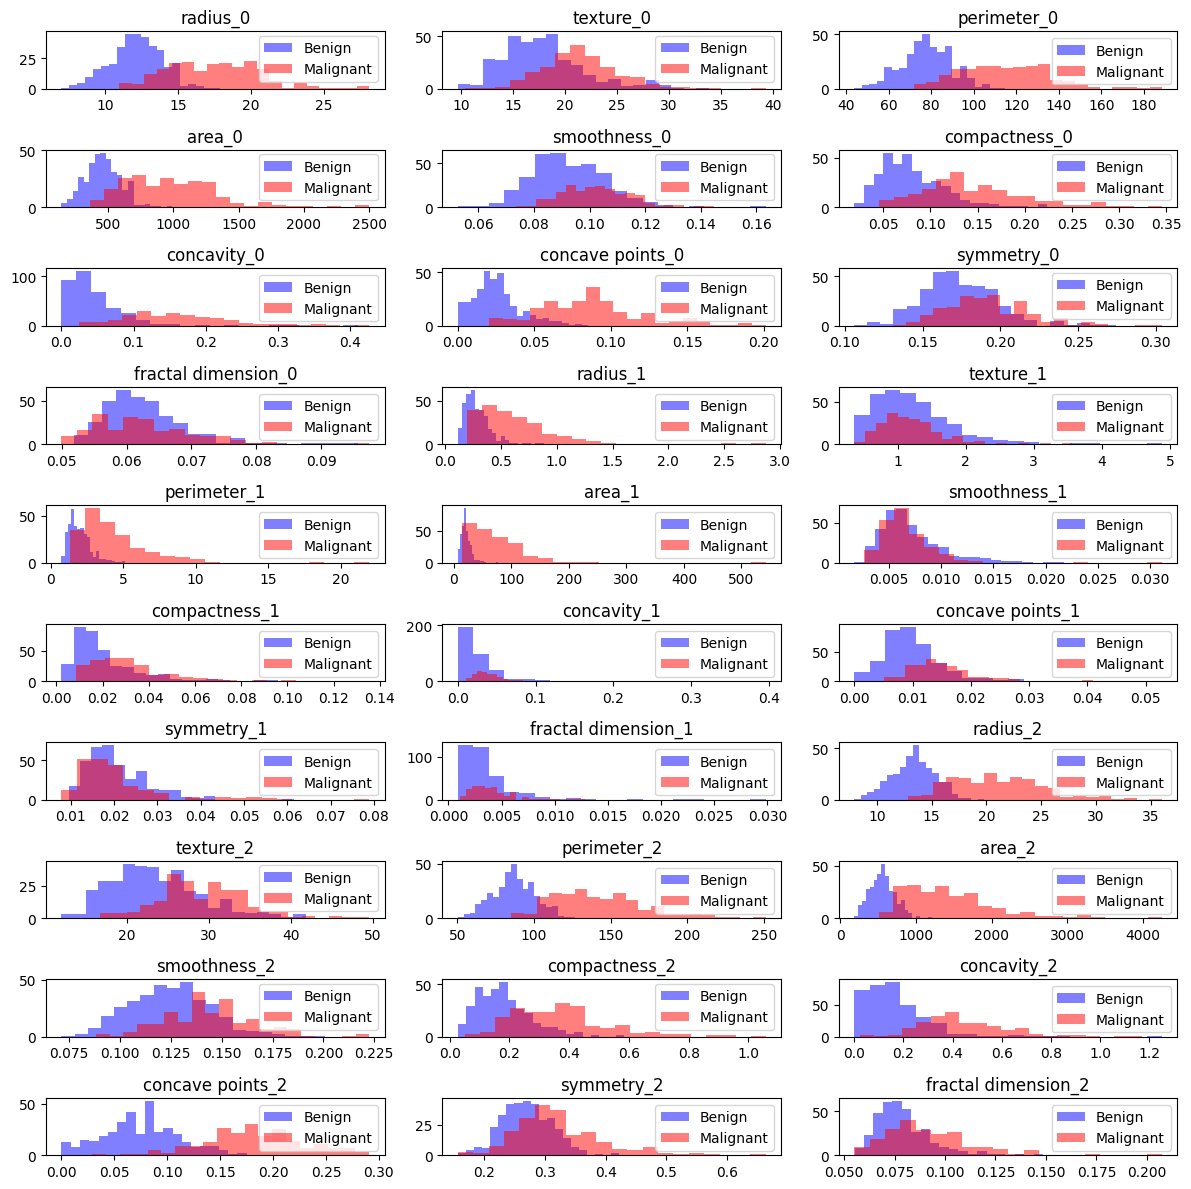

In [104]:
fig, axs = plt.subplots(10, 3, figsize=(12, 12))
axs = axs.flatten()

# Limit the number of features to the length of axs array
num_features = min(len(features.columns), len(axs))

for i, feature in enumerate(features.columns[:num_features]):
    axs[i].hist(benign[feature], bins=20, alpha=0.5, color='blue', label='Benign')
    axs[i].hist(malignant[feature], bins=20, alpha=0.5, color='red', label='Malignant')
    axs[i].set_title(feature)
    axs[i].legend()

plt.tight_layout()
plt.show()